# Regression metric

![reg_metric](https://images.unsplash.com/photo-1548175551-1edaea7bbf0d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=874&q=80)


photo by [Crissy Jarvis](https://unsplash.com/@crissyjarvis) at [Unsplash](https://unsplash.com/)

## Introduction

this is the companion colab code for my tutorial in medium about regression metrics in Python , please read the article for better understanding of the code. In the article I discuss about the theory, the math and how efficiently use the associate libraries. Here I am providing just generic information about the algorithm and the code. 
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[Medium article about Least squares regression math](https://)



note: the articles will be publish soon

for other stories check my medium profile:
[Salvatore Raieli](https://salvatore-raieli.medium.com/)

**Importing libraries and functions**

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random


## Regression metrics with NumPy

Here we will define functions using NumPy instead of using the built-in function from scikit-learn. In the tutorial associated to this notebook I am presenting the math behind. 

I will use two dummy listes, y and y_hat to show the behaviour of the functions, in the second part of this tutorial we will test the regression metrics with real data (using a real dataset). 
here you find also the code for the images present in the tutorial.

Quick links to the wikipedia pages for the different metrics:

* [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
* [Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
* [ Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
* [Root Mean Squared Logarithmic Error](https://www.kaggle.com/carlolepelaars/understanding-the-metric-rmsle)  from kaggle
* [ R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination)
* [ Adjusted R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

In [60]:
y = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_hat = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

In [61]:
def MSE(y = None, y_hat = None, avg = True ):
    """ Mean Square Error """
    y = np.array(y)
    y_hat = np.array(y_hat)
    #calculate the squared error
    err = [(y[i] - y_hat[i])**2 for i in range(len(y)) ]
    #calculate the mean
    if avg == True:
        err = np.sum(err)/len(y)
    return err
  
print("MSE : {:.2f}".format(MSE(y, y_hat )) )

MSE : 0.35


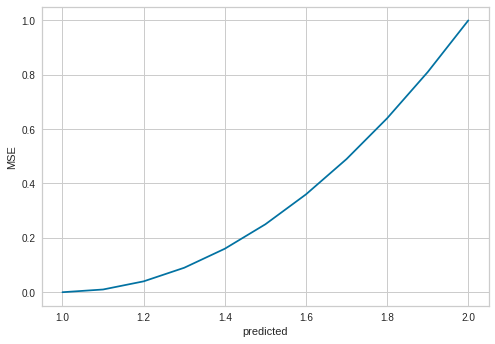

In [62]:
df = pd.DataFrame()
df["True_value"] = y
df["predicted"] = y_hat
df["MSE"] = MSE(y, y_hat, avg = False )
sns.lineplot(data=df, x="predicted", y="MSE")

In [73]:
def RMSE(y = None, y_hat = None, avg = True ):
    """ Root Mean Square Error """
    y = np.array(y)
    y_hat = np.array(y_hat)
    #calculate the squared error
    err = [(y[i] - y_hat[i])**2 for i in range(len(y)) ]
    err = np.sum(err)/len(y)
    return np.sqrt(err)
  
print("RMSE : {:.2f}".format(RMSE(y, y_hat )) )

RMSE : 0.59


In [81]:
#if you want to normalize in one of the different ways
def NRMSE(y = None, y_hat = None, norm_method = "range" ):
    """ Normalized Root Mean Square Error """
    y = np.array(y)
    y_hat = np.array(y_hat)
    #calculate the squared error
    err = [(y[i] - y_hat[i])**2 for i in range(len(y)) ]
    err = np.sum(err)/len(y)
    if norm_method == "range":
      norm_p = max(y) -min(y)
      return np.sqrt(err) /norm_p
    if norm_method == "mean":
      norm_p = np.mean(y)
      return np.sqrt(err) /norm_p
    if norm_method == "st_dev":
      norm_p = np.std(y)
      return np.sqrt(err) /norm_p
    if norm_method == "quartile":
      norm_p = np.quantile(y, 0.75) - np.quantile(y, 0.25)
      return np.sqrt(err) /norm_p
  


In [92]:
y_true = [np.round(random.uniform(-4, 4), 5) for i in range(20)]
y_pred = [np.round(random.uniform(-4, 4), 5) for i in range(20)]
print("RMSE : {:.2f}".format(RMSE(y_true, y_pred )) )
print("NRMSE- normalized with range : {:.2f}".format(NRMSE(y_true, y_pred )) )
print("NRMSE- normalized with mean : {:.2f}".format(NRMSE(y_true, y_pred, norm_method = "mean" )) )
print("NRMSE- normalized with standard deviation : {:.2f}".format(NRMSE(y_true, y_pred, norm_method = "st_dev" )) )
print("NRMSE- normalized with interquartile range : {:.2f}".format(NRMSE(y_true, y_pred, norm_method = "quartile" )) )

RMSE : 3.63
NRMSE- normalized with range : 0.49
NRMSE- normalized with mean : 43.11
NRMSE- normalized with standard deviation : 1.56
NRMSE- normalized with interquartile range : 0.98


MAE : 0.50


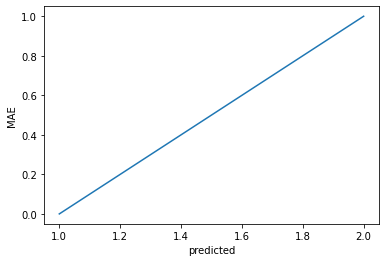

In [6]:
def MAE(y = None, y_hat = None, avg = True):
    """ Mean Absolute Error """
    y = np.array(y)
    y_hat = np.array(y_hat)
    #calculate the absolute error
    err = [np.abs(y[i] - y_hat[i]) for i in range(len(y)) ]
    #calculate the mean
    if avg:
        err = np.sum(err)/len(y)
    return err

print("MAE : {:.2f}".format(MAE(y, y_hat )) )
df["MAE"] = MAE(y, y_hat, avg = False )
sns.lineplot(data=df, x="predicted", y="MAE")

MSLE : 0.06


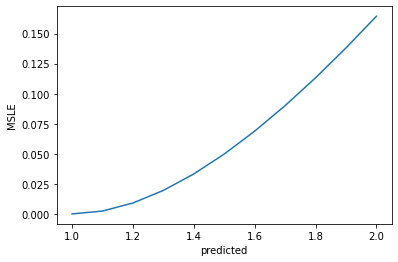

In [7]:
def MSLE(y = None, y_hat = None, avg = True):
    """ Mean squared logarithmic error  """
    y = np.array(y)
    y_hat = np.array(y_hat)
    #calculate the squared error
    err = [(np.log(1 + y[i])- np.log(1 + y_hat[i]))**2 for i in range(len(y)) ]
    #calculate the mean
    if avg:
        err = np.sum(err)/len(y)
    return err

print("MSLE : {:.2f}".format(MSLE(y, y_hat )) )
df["MSLE"] = MSLE(y, y_hat, avg = False )
sns.lineplot(data=df, x="predicted", y="MSLE")

In [8]:
def RMSLE(y = None, y_hat = None):
    """ Root Mean Squared Logarithmic Error  """
    y = np.array(y)
    y_hat = np.array(y_hat)
    #calculate the squared error
    err = [(np.log(1 + y[i])- np.log(1 + y_hat[i]))**2 for i in range(len(y)) ]
    err = np.sum(err)/len(y)
    err = np.sqrt(err) #square root
    return err

print("RMSLE : {:.2f}".format(RMSLE(y, y_hat )) )

RMSLE : 0.25


MAPE : 0.50


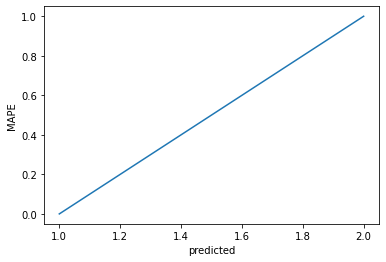

In [9]:
def MAPE(y = None, y_hat = None, avg = True ):
    """ Mean Absolute Percentage Error  """
    y = np.array(y)
    y_hat = np.array(y_hat)
    epsilon = np.finfo(np.float64).eps
    err = np.abs(y_hat - y) / np.maximum(np.abs(y), epsilon)
    #calculate the mean
    if avg:
        err = np.sum(err)/len(y)
    return err

print("MAPE : {:.2f}".format(MAPE(y, y_hat )) )
df["MAPE"] = MAPE(y, y_hat, avg = False )
sns.lineplot(data=df, x="predicted", y="MAPE")

In [10]:
y_true = [1, 9, 1e5]
y_pred = [0.8, 14, 1.4e5]
MAE(y_true, y_pred ), MAPE(y_true, y_pred )

(13335.066666666666, 0.38518518518518513)

In [11]:
def R_squared(y = None, y_hat = None):
    y = np.array(y)
    y_hat = np.array(y_hat)
    #calculate the squared error and sum it
    se = [(y[i] - y_hat[i])**2 for i in range(len(y)) ]
    se = np.sum(se)
    #calculate the squared difference from the mean
    mean = np.mean(y)
    sd = [(y[i] - mean)**2 for i in range(len(y)) ]
    sd = np.sum(sd)
    #calculater R2
    err = 1 - (se/sd)
    return err
  

#in this case we cannot use
#print("r^2 : {:.2f}".format(R_squared(y, y_hat )) )

In [12]:
def adj_R_squared(y = None, y_hat = None, n = 1, k = 1):
  """ calculate adjusted r squared
      n = number of examples in the dataset
      k = number of features in the dataset """
  err = R_squared(y , y_hat)
  num = (1 - err)* (n-1) #calculate the numerator
  den = (n -k -1) #calculate the denominator
  err = 1 -(num/den)
  return err

In [13]:
def Max_error(y = None, y_hat = None):
    y = np.array(y)
    y_hat = np.array(y_hat)
    #calculate the absolute error
    err = [np.abs(y[i] - y_hat[i]) for i in range(len(y)) ]
    #calculate the maximum
    return np.max(err)

print("Max_error : {:.2f}".format(Max_error(y, y_hat )) )

Max_error : 1.00


## Difference between R-squared and Adjusted R-squared

we are now using make_regression for sklearn to create a test dataset for regression. with make_regression you can create a dataset of the size you want, you can decide the number of examples you want, the number of features. With the parameter n_informative you decide the number of informative features you want.

We will then create a loop, where we create random features and we will calculate after each addition the r-squared and the adjusted r-squared. We will then plot them to see if the are difference

In [14]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
#create a dataset for regression and fit a classifier
regr = tree.DecisionTreeRegressor(max_depth=5)
X, t = datasets.make_regression(n_samples = 500, n_features = 20, n_informative = 10)
X = pd.DataFrame(X)
regr.fit(X,t)
pred = regr.predict(X)
r = R_squared(t, pred )
ad_r = adj_R_squared(t, pred, n =len(t), k = X.shape[1] )
r, ad_r


(0.7416947248539696, 0.7309095359125904)

In [67]:
import warnings
warnings.filterwarnings("ignore") 
rs = []
ad_rs = []
#we are creating a loop where we progressively add features
#at each time we retrain the classifier and we calculates the metrics
for i in range(100):
  X[str(19+i)] = [np.round(random.uniform(-4, 4), 5) for i in range(X.shape[0])]
  regr = tree.DecisionTreeRegressor(max_depth=5)
  regr.fit(X,t)
  pred = regr.predict(X)
  rs.append(R_squared(t, pred ))
  ad_rs.append(adj_R_squared(t, pred, n =len(t), k = X.shape[1] ))


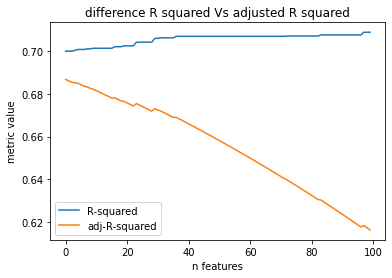

In [68]:
#let's plot it
#if your graph is slight different is ok, since the features are generate randomly
x = range(len(rs))
plt.plot(x, rs, label='R-squared')
plt.plot(x, ad_rs, label='adj-R-squared')
plt.title('difference R squared Vs adjusted R squared')
plt.xlabel("n features")
plt.ylabel("metric value")
plt.legend()


## An example with Scikit-learn

I will show you an example using Scikit-learn and it built-in functions for evaluate regression. Scikit-learn provide many built-in functions for many cases.

You can check here the documentation:

[regression metric documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)




In [23]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (explained_variance_score, max_error, mean_absolute_error, 
                             mean_squared_error, mean_squared_log_error, median_absolute_error,
                            r2_score,mean_absolute_percentage_error)

In [15]:
data_dir = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/Boston.csv"
df = pd.read_csv(data_dir)
df.describe() 

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


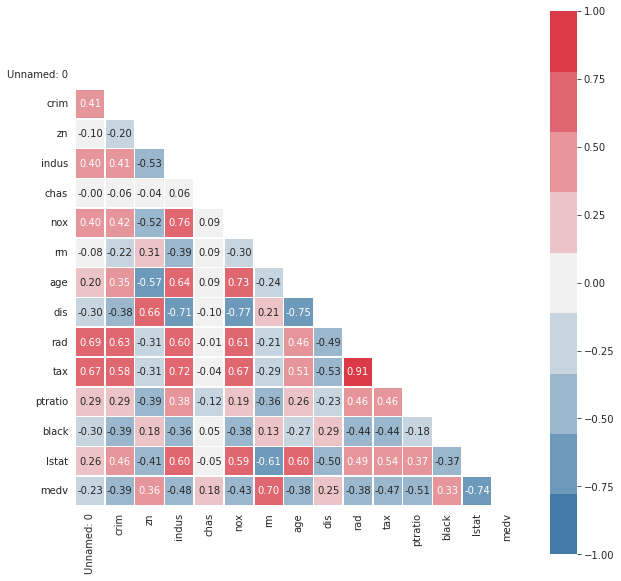

In [16]:
corr = df.corr() #calulating the correlation
mask = np.zeros_like(corr) #to mask the other corner, which is redundant
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, linewidths=.5, 
                     cmap=sns.diverging_palette(240, 10, n=9), #diverging palette to show corr and anticorr in different colors
                     vmin = -1, vmax = 1, annot=True, fmt=".2f", square=True)

Text(0.5, 1.0, 'median price')

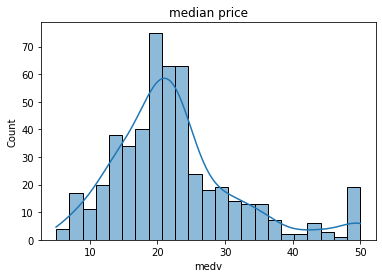

In [17]:
#plotting a histogram 
ax = sns.histplot(x="medv",  kde=True, data=df)
ax.set_title('median price')

In [18]:
#separing the input features from the target variable
y = df["medv"]
X = df.drop(["medv"], axis=1)
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.2, #test size would be 20%
                                                        random_state = 42 #42 is for good luck!
                                                        ) 


In [20]:
# generate an xgboost regression model
model = XGBRegressor()
#fit the model
model.fit(X_train, y_train)
#predict for the test dataset
pred = model.predict(X_test)

[11:08:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
#let's calculate them
MAE = mean_absolute_error(y_test, pred)
Max_err = max_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
R2 = r2_score(y_test, pred)
MSLE = mean_squared_log_error(y_test, pred)
MAPE = mean_absolute_percentage_error(y_test, pred)
#to obtain the root we need to use the squared argument
RMSE = mean_squared_error(y_test, pred, squared = False)
RMSLE = mean_squared_log_error(y_test, pred, squared = False)
#Adjusted R-squared
adj_R2 = 1 - (( (1 - R2)* (len(y_test) - 1)) / (len(y_test) - X_train.shape[1] - 1))
#let's print them (we round the error to only two decimals)
print("MAE : {:.2f}, Max error : {:.2f}".format(MAE, Max_err) )
print("MSE : {:.2f}, R-squared : {:.2f}".format(MSE, R2) )
print("MSLE : {:.2f}, MAPE : {:.2f}".format(MSLE, MAPE) )
print("RMSLE : {:.2f}, RMSE : {:.2f}".format(RMSLE, RMSE) )
print("Adjusted R-squared : {:.2f}, R-squared : {:.2f}".format(adj_R2, R2) )

MAE : 1.99, Max error : 10.26
MSE : 6.92, R-squared : 0.91
MSLE : 0.02, MAPE : 0.10
RMSLE : 0.13, RMSE : 2.63
Adjusted R-squared : 0.89, R-squared : 0.91


Some nice visualization for your model, you can use yellowbrics to visualize the regression results, the plot are discussed in details in the linear regression tutorial

[11:40:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


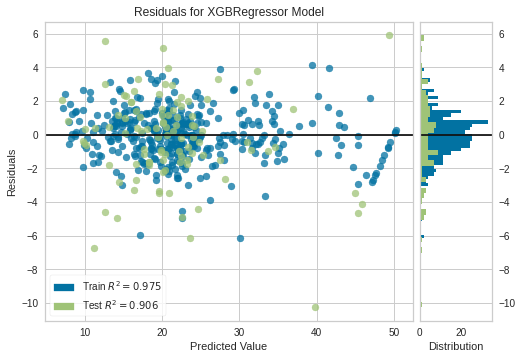

In [40]:
from yellowbrick.regressor import ResidualsPlot, PredictionError
mod = XGBRegressor().fit(X_train, y_train)
visualizer = ResidualsPlot(mod)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

[11:41:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


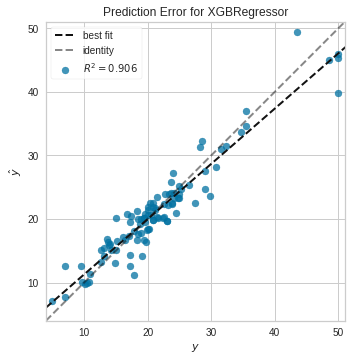

In [43]:
mod = XGBRegressor().fit(X_train, y_train)
visualizer = PredictionError(mod)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 